<a href="https://colab.research.google.com/github/Chuck2Win/Linear_regression-from-Scratch-/blob/master/Linear_Regression_with_multiple_variables(from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
train_data=pd.read_csv('https://raw.githubusercontent.com/Chuck2Win/Linear_regression-from-Scratch-/master/data/data_train.csv',header=None)
test_data=pd.read_csv('https://raw.githubusercontent.com/Chuck2Win/Linear_regression-from-Scratch-/master/data/data_test.csv',header=None)

In [7]:
train_data.head() 
# last columns is target

,0,1,2,3
0,0.273548,-8.932102,18.708684,73.578825
1,5.403327,4.782977,-18.762210,-56.410433
2,0.029941,-3.245916,6.932498,52.390768
3,3.047974,0.715211,-1.965419,-6.936295
4,1.302074,-5.871807,-15.702181,-34.997017


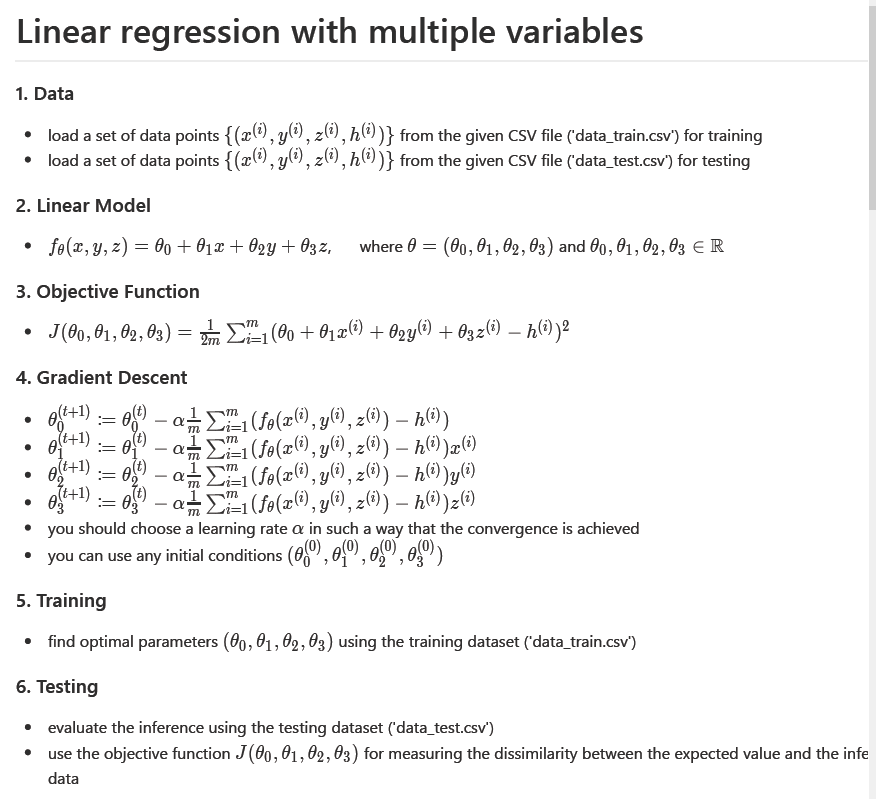



In [33]:
# x,y and expand x with 1
train_x,train_y=train_data.to_numpy()[:,:-1],train_data.to_numpy()[:,-1]
tmp=np.ones((train_x.shape[0],train_x.shape[1]+1))
tmp[:,1:]=train_x.copy()
train_x=tmp
test_x,test_y=test_data.to_numpy()[:,:-1],test_data.to_numpy()[:,-1]
tmp=np.ones((test_x.shape[0],test_x.shape[1]+1))
tmp[:,1:]=test_x.copy()
test_x=tmp

In [74]:
def linear_model(x,theta):
    '''
    x shape : m, p+1 
    m : # of data
    p: # of features
    theta : vector , shape (p+1)
    '''
    return np.dot(x,theta)
    
def objective_function(x,y,theta):
    # mean squared error
    return ((linear_model(x,theta)-y)**2).mean()/2

def gradient_descent(theta,x,y,learning_rate):
    theta=theta-learning_rate*(((linear_model(train_x,theta)-train_y)).reshape(-1,1)*train_x).sum(axis=0)
    return theta

In [98]:
# training
# theta_0 ~ theta_3 초기값 : 10
# learning rate 0.01
cost=[]
epochs=10000
theta=[1,1,1,1] # point
Theta=[theta] 
learning_rate=0.00000005 # point 
for epoch in range(epochs):
    cost.append(objective_function(train_x,train_y,theta))
    theta=gradient_descent(theta,train_x,train_y,learning_rate)
    Theta.append(theta)

# 1. plot the estimated parameters using the training dataset
theta 0 : black, theta 1 : red, theta 2 : green, theta 3 : blue

In [107]:
Theta=np.array(Theta)

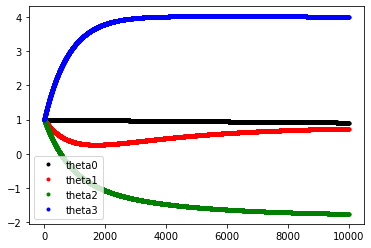

In [113]:
for _,i in enumerate(zip(['theta0','theta1','theta2','theta3'],['black','red','green','blue'])):
    plt.plot(Theta[:,_],'.',c=i[1],label=i[0])
    plt.legend(loc='best')
plt.show()

# 2. Plot the training error using the training data set

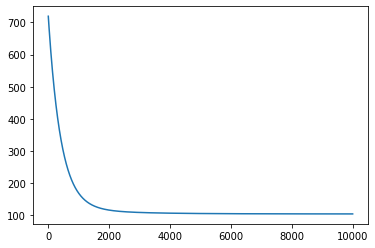

In [114]:
plt.plot(cost)

# 3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence


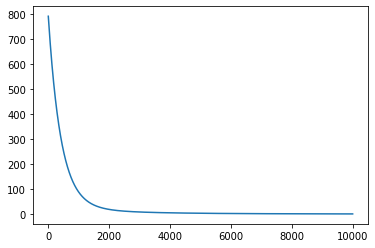

In [115]:
test_cost=[]
for epoch in range(epochs):
    test_cost.append(objective_function(test_x,test_y,Theta[epoch,:]))
plt.plot(test_cost)

In [ ]:
##### version 2 #### 

def linear_model(x,theta0,theta1,theta2,theta3):
    '''
    x shape : m, p 
    m : # of data
    p: # of features
    '''
    
    return theta0+np.dot(x,[theta1,theta2,theta3])
    
def objective_function(x,y,theta0,theta1,theta2,theta3):
    # mean squared error
    return ((linear_model(x,theta0,theta1,theta2,theta3)-y)**2).mean()/2

def gradient_descent(theta,learning_rate):
    theta_0_=theta_0-learning_rate*((linear_model(x,theta0,theta1,theta2,theta3)-y).sum())
    theta_1_=theta_1-learning_rate*(((linear_model(x,theta0,theta1,theta2,theta3)-y)*x[:,1]).sum())
    theta_2_=theta_2-learning_rate*(((linear_model(x,theta0,theta1,theta2,theta3)-y)*x[:,2]).sum())
    theta_3_=theta_3-learning_rate*(((linear_model(x,theta0,theta1,theta2,theta3)-y)*x[:,3]).sum())
    return theta_0_,theta_1_,theta_2_,theta_3_